## Observations and Insights 

In [ ]:
# - Drug Regimens Capomulin and Ramicane were given to the most mice, and were also some of the most 
# effective treatments in reducing tumor growth, although Capomulin was the most effective. 
# - There is a positive relationship, and strong correlation (.82) between mouse weight and tumor volume.
# This demonstrates mouse weight may be a factor contributing to tumor volume.
# - Drug Regimen Ketapril resulted in the greatest variance of tumor volume, positioning it as one 
# of the least effective regimens.

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse = pd.read_csv(mouse_path)
study_results = pd.read_csv(study_results_path)

In [63]:
# Combine the data into a single dataset
merged_study = pd.merge(study_results, mouse, on="Mouse ID", how = 'left')

# Display the data table for preview
merged_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [64]:
# Checking the number of mice.
len(merged_study['Mouse ID'].unique())

249

In [65]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicates on specific column(s) using subset.
duplicates = merged_study.loc[merged_study.duplicated(subset=['Mouse ID','Timepoint'])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [66]:
# Optional: Get all the data for the duplicate mouse ID. 
id_g989 = merged_study[merged_study["Mouse ID"] == "g989"]
id_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [67]:
## Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_study = merged_study[merged_study["Mouse ID"] != "g989"]
merged_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [68]:
# Checking the number of mice in the clean DataFrame.
new_mice = merged_study['Mouse ID'].nunique()
new_mice

248

## Summary Statistics

In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_dr = merged_study.groupby("Drug Regimen")
mean_tv = grouped_dr['Tumor Volume (mm3)'].mean()
median_tv = grouped_dr['Tumor Volume (mm3)'].median()
tv_std_dev = grouped_dr['Tumor Volume (mm3)'].std()
tv_variance = grouped_dr['Tumor Volume (mm3)'].var()
tv_std_err = grouped_dr['Tumor Volume (mm3)'].sem()

In [70]:
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({
            'Mean Tumor Volume': mean_tv,
            'Median Tumor Volume': median_tv, 
            'Tumor Volume Variance': tv_variance,
            'Tumor Volume Std. Dev': tv_std_dev,
            'Tumor Volume Std. Err.': tv_std_err
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_dr = merged_study.groupby('Drug Regimen')
aggregation_df = grouped_dr.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
aggregation_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

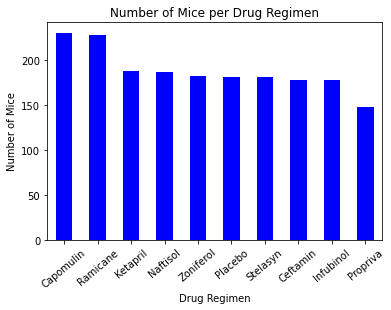

In [72]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_grouped_dr = merged_study.groupby("Drug Regimen").count()['Mouse ID']
# Sort mice to order bar graph
sorted_mice = mice_grouped_dr.sort_values(ascending=False)
# Plot bar chart using pandas
mice_count_chart = sorted_mice.plot(kind='bar', rot=40, color='blue')
# Set xlabel, ylabel and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen");

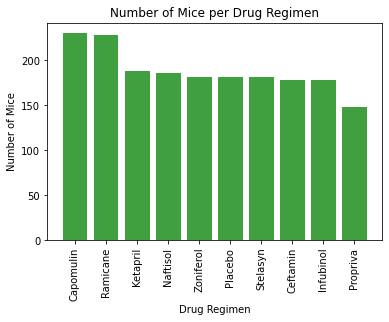

In [73]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Set labels
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation='vertical')

# Plot bar graph using matplotlib
plt.bar(sorted_mice.index.values, sorted_mice.values, facecolor="green", alpha=0.75, align="center");

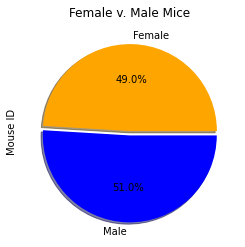

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_grouped = merged_study.groupby("Sex").count()['Mouse ID']
# Plot pie chart
colors = ["orange", "blue"]
plt.title("Female v. Male Mice")
explode = (0, 0.05)
sex_grouped_chart = sex_grouped.plot(kind='pie', explode=explode, colors=colors,
                                     autopct="%1.1f%%", shadow=True,)


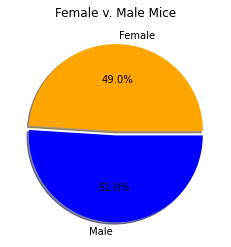

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female","Male"]
per = [49.0, 51.0]
colors = ["orange", "blue"]
plt.pie(per, explode=explode,labels=sex, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Female v. Male Mice")
explode = (0, 0.05)


## Quartiles, Outliers and Boxplots

In [76]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to save tv variable
final_tv = []
# Run for loop through drug_regimen
for regimen in drug_regimen:
    treatment = merged_study[merged_study["Drug Regimen"] == regimen]
    # Get the last (greatest) timepoint for each mouse
    treatment_last = treatment.groupby('Mouse ID').max()['Timepoint']
    treatment_merge = pd.merge(treatment_last, merged_study, on=("Mouse ID","Timepoint"),how="left")
    treatment_tv = treatment_merge['Tumor Volume (mm3)']
    final_tv.append(treatment_tv)

In [77]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for num,tvs in enumerate (final_tv):
    quartiles = tvs.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug_regimen[num]} Potential Outliers: values below {lower_bound} or above {upper_bound}")

Capomulin Potential Outliers: values below 20.70456164999999 or above 51.83201549
Ramicane Potential Outliers: values below 17.912664470000003 or above 54.30681135
Infubinol Potential Outliers: values below 36.83290494999999 or above 82.74144559000001
Ceftamin Potential Outliers: values below 25.355449580000002 or above 87.66645829999999


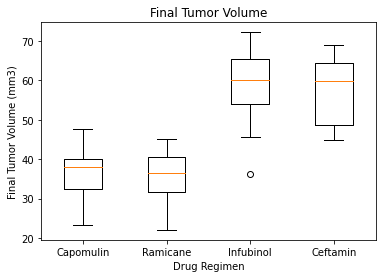

In [78]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.title('Final Tumor Volume')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.boxplot(final_tv, labels=drug_regimen)
plt.show()

## Line and Scatter Plots

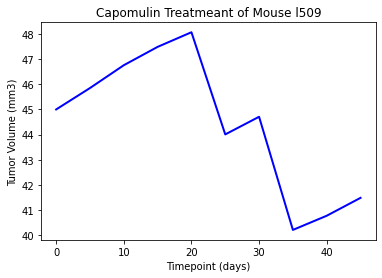

In [79]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Mouse 1509 was treated with Capomulin, locate mouse
line_plot = merged_study[merged_study["Mouse ID"] == "l509"]

# Create x and y axis
x_axis = line_plot['Timepoint']
y_axis = line_plot['Tumor Volume (mm3)']

# Create labels and plot graph
plt.plot(x_axis, y_axis,linewidth=2,color="blue")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatmeant of Mouse l509')
plt.show()

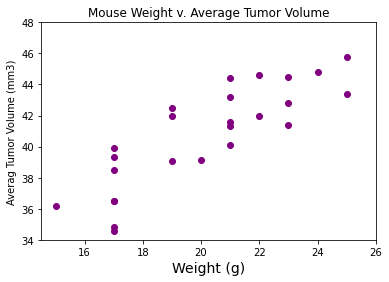

In [90]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Segment mice on Capomulin regimen
Capomulin = merged_study[merged_study["Drug Regimen"] == "Capomulin"]
# Find average tumor volumne and mouse weight of Capomulin mice
scatter_plot =Capomulin.groupby(['Mouse ID']).mean()
# Plot scatter of Capomulin mice
x_values = scatter_plot['Weight (g)']
y_values = scatter_plot['Tumor Volume (mm3)']
plt.scatter(x_values,y_values, color="purple")
plt.title('Mouse Weight v. Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
marker_size=20
plt.xlim(14.5,26)
plt.ylim(34,48);

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


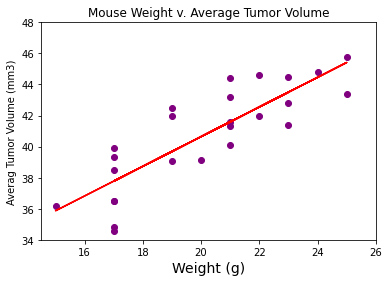

In [92]:
# Calculate the correlation coefficient and linear regression model for 
# mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}") 

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (scatter_plot['Weight (g)']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.scatter(x_values, y_values, color="purple")
plt.plot(x_values,regress_values,"r-")
plt.title('Mouse Weight v. Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
marker_size=20
plt.xlim(14.5,26)
plt.ylim(34,48);